In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_path = '../0.datasets/DailyDelhiClimateTrain.csv'

test_path = '../0.datasets/DailyDelhiClimateTest.csv'

train_df = pd.read_csv(train_path)

test_df = pd.read_csv(test_path)

# print(train_df.info())

# print(train_df.describe())


In [16]:
print(train_df.isnull().sum())
# print(test_df.isnull().sum())

train_df = train_df.interpolate()

print(train_df.isnull().sum())


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


/tmp/ipykernel_140263/171305552.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  train_df = train_df.interpolate()


In [17]:
train_df['date'] = pd.to_datetime(train_df['date']) 
test_df['date'] = pd.to_datetime(test_df['date']) 

train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)

print(train_df.head())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


<function matplotlib.pyplot.show(close=None, block=None)>

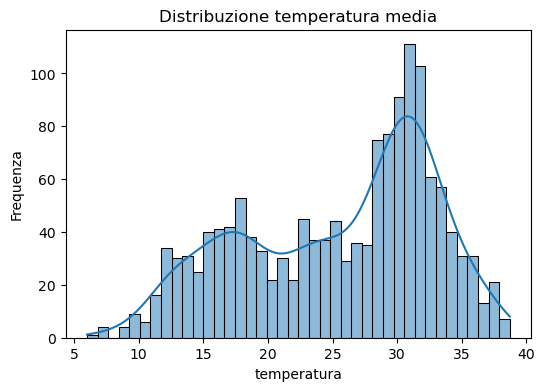

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(train_df['meantemp'], kde=True, bins=40)
plt.title('Distribuzione temperatura media')
plt.xlabel('temperatura')
plt.ylabel('Frequenza')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

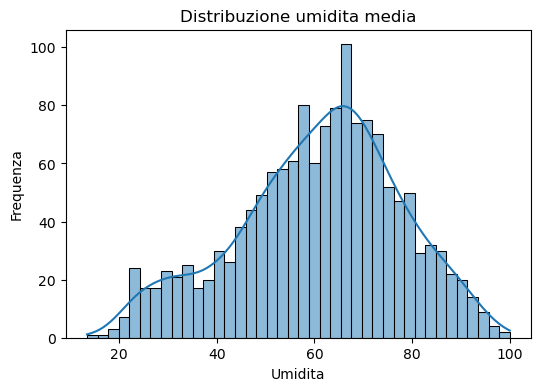

In [22]:
plt.figure(figsize=(6, 4))
sns.histplot(train_df['humidity'], kde=True, bins=40)
plt.title('Distribuzione umidita media')
plt.xlabel('Umidita')
plt.ylabel('Frequenza')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

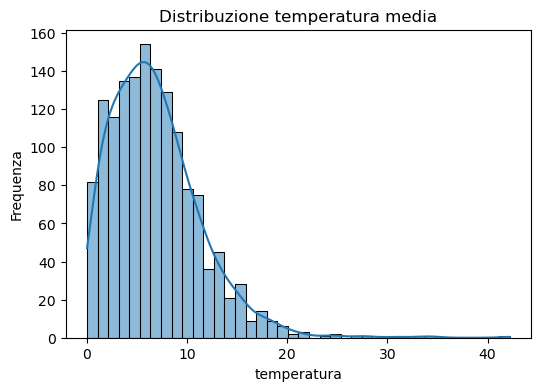

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(train_df['wind_speed'], kde=True, bins=40)
plt.title('Distribuzione temperatura media')
plt.xlabel('temperatura')
plt.ylabel('Frequenza')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

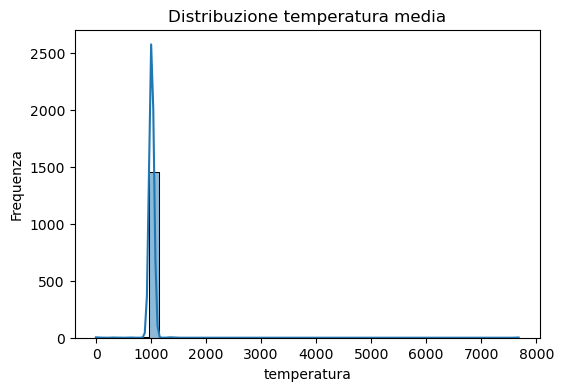

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(train_df['meanpressure'], kde=True, bins=40)
plt.title('Distribuzione temperatura media')
plt.xlabel('temperatura')
plt.ylabel('Frequenza')
plt.show

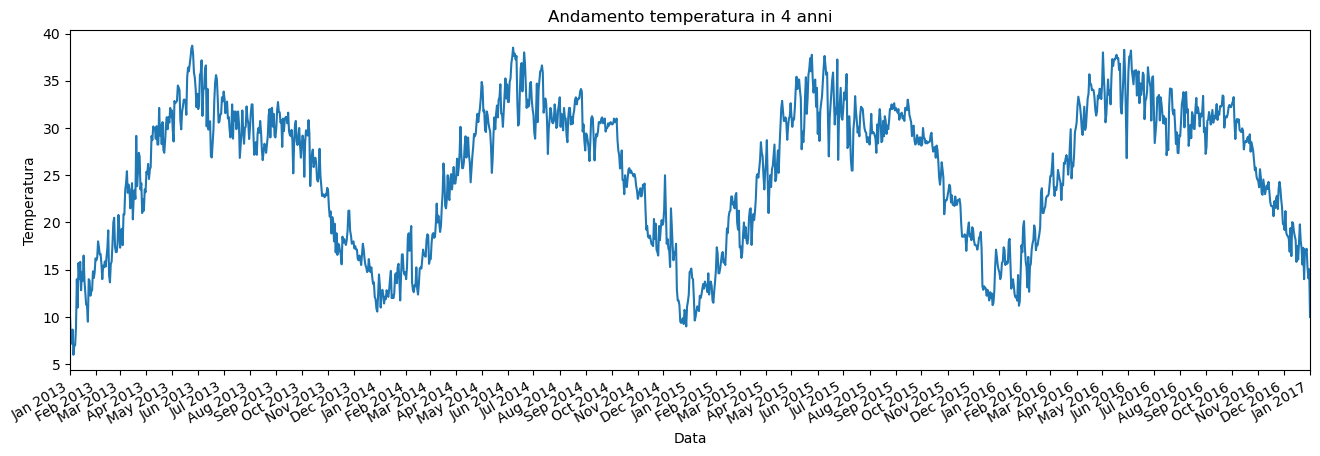

In [27]:
import matplotlib.dates as mdates

plt.figure(figsize=(16, 5))
train_df['meantemp'].plot()
plt.title("Andamento temperatura in 4 anni")
plt.ylabel('Temperatura')
plt.xlabel('Data')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.gcf().autofmt_xdate()

plt.show()

